#Support Vector Classifiers

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
### lets create synthetic data points
from sklearn.datasets import make_classification

In [121]:
X,y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=102)

In [122]:
X

array([[ 1.33527357,  0.0861483 ],
       [ 0.72698294, -0.65032446],
       [ 0.80260673, -1.6755644 ],
       [-0.9111631 , -2.50687937],
       [ 0.7781321 ,  1.63123838],
       [-0.16332483,  0.76103189],
       [ 1.78356813,  0.26431585],
       [ 0.26327889,  1.24026349],
       [ 1.55694653, -0.19539791],
       [ 1.76769742, -3.07746364],
       [ 0.98930351, -2.18004197],
       [ 0.08904536,  1.29622258],
       [-0.27747513,  1.64949398],
       [ 0.78477702, -1.51834474],
       [ 0.38284237, -3.33141358],
       [ 1.6982443 , -0.52574753],
       [ 0.65503614, -1.30197047],
       [ 0.89386206,  1.48068228],
       [ 1.74901174,  0.56274696],
       [ 0.43646952,  0.40315442],
       [ 0.44576198,  1.47706605],
       [ 1.50581133, -1.61914256],
       [ 0.1168053 ,  1.21229708],
       [ 2.87460802, -1.44923533],
       [ 0.08119643, -0.66383848],
       [ 1.08586618, -2.34383122],
       [ 1.19868616, -0.68611625],
       [-0.64883665,  1.38131481],
       [ 1.56932962,

In [123]:
y

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0])

In [124]:
df = pd.DataFrame(X)
df[0]

0     1.335274
1     0.726983
2     0.802607
3    -0.911163
4     0.778132
        ...   
95   -0.386591
96    1.499318
97    1.382989
98    1.345034
99    1.781363
Name: 0, Length: 100, dtype: float64

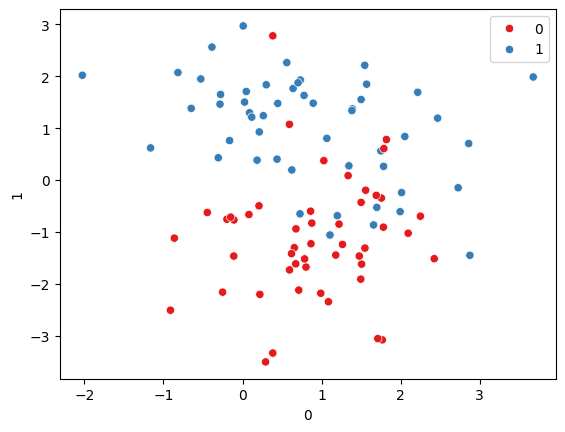

In [125]:
# use keyword-only arguments for x and y (scatterplot requires keyword args in recent seaborn versions)
sns.scatterplot(x=df[0], y=df[1], hue=y, palette='Set1')
plt.show()

In [126]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [127]:
from sklearn.svm import SVC

In [128]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [129]:
y_pred = svc.predict(X_test)

In [130]:
from sklearn.metrics import classification_report, confusion_matrix

In [131]:
print(confusion_matrix(y_test, y_pred))

[[12  3]
 [ 2  8]]


In [132]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.73      0.80      0.76        10

    accuracy                           0.80        25
   macro avg       0.79      0.80      0.79        25
weighted avg       0.81      0.80      0.80        25



In [135]:
svc1 = SVC(kernel='sigmoid')
svc1.fit(X_train, y_train)
y_pred1 = svc1.predict(X_test)
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[12  3]
 [ 1  9]]
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.75      0.90      0.82        10

    accuracy                           0.84        25
   macro avg       0.84      0.85      0.84        25
weighted avg       0.85      0.84      0.84        25



In [136]:
svc1 = SVC(kernel='rbf')
svc1.fit(X_train, y_train)
y_pred1 = svc1.predict(X_test)
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[12  3]
 [ 2  8]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.73      0.80      0.76        10

    accuracy                           0.80        25
   macro avg       0.79      0.80      0.79        25
weighted avg       0.81      0.80      0.80        25



In [138]:
svc1 = SVC(kernel='poly')
svc1.fit(X_train, y_train)
y_pred1 = svc1.predict(X_test)
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[10  5]
 [ 2  8]]
              precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.62      0.80      0.70        10

    accuracy                           0.72        25
   macro avg       0.72      0.73      0.72        25
weighted avg       0.75      0.72      0.72        25



In [139]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf','poly','sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3, cv=5)

In [141]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.733 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.733 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.733 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.800 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.533 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.600 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.933 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.800 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf', 'poly', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [142]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [143]:
y_pred4 = grid.predict(X_test)
print(confusion_matrix(y_test, y_pred4))
print(classification_report(y_test, y_pred4))

[[12  3]
 [ 2  8]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.73      0.80      0.76        10

    accuracy                           0.80        25
   macro avg       0.79      0.80      0.79        25
weighted avg       0.81      0.80      0.80        25



In [148]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf','poly','sigmoid']}
grid = RandomizedSearchCV(SVC(),param_grid,refit=True,verbose=3, cv=5)

In [149]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.733 total time=   0.0s
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.733 total time=   0.0s
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.867 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.933 total time=   0.0s
[CV 3/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.667 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.733 total time=   0.0s
[CV 5/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.933 total time=   0.0s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.800 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;

,estimator,SVC()
,param_distributions,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf', 'poly', ...]}"
,n_iter,10
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [150]:
grid.best_params_

{'kernel': 'rbf', 'gamma': 0.1, 'C': 10}

In [151]:
y_pred4 = grid.predict(X_test)
print(confusion_matrix(y_test, y_pred4))
print(classification_report(y_test, y_pred4))

[[12  3]
 [ 2  8]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.73      0.80      0.76        10

    accuracy                           0.80        25
   macro avg       0.79      0.80      0.79        25
weighted avg       0.81      0.80      0.80        25



In [156]:
from skopt import BayesSearchCV

param_grid = {'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf','poly','sigmoid']}
grid = BayesSearchCV(SVC(),param_grid,refit=True,verbose=3, cv=5)

In [157]:
grid.fit(X_train,y_train)
grid.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..C=100, gamma=0.1, kernel=sigmoid;, score=0.800 total time=   0.0s
[CV 2/5] END ..C=100, gamma=0.1, kernel=sigmoid;, score=1.000 total time=   0.0s
[CV 3/5] END ..C=100, gamma=0.1, kernel=sigmoid;, score=0.667 total time=   0.0s
[CV 4/5] END ..C=100, gamma=0.1, kernel=sigmoid;, score=0.800 total time=   0.0s
[CV 5/5] END ..C=100, gamma=0.1, kernel=sigmoid;, score=0.933 total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END .....C=100, gamma=0.1, kernel=poly;, score=0.733 total time=   0.0s
[CV 2/5] END .....C=100, gamma=0.1, kernel=poly;, score=0.800 total time=   0.0s
[CV 3/5] END .....C=100, gamma=0.1, kernel=poly;, score=0.533 total time=   0.0s
[CV 4/5] END .....C=100, gamma=0.1, kernel=poly;, score=0.600 total time=   0.0s
[CV 5/5] END .....C=100, gamma=0.1, kernel=poly;, score=0.933 total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END 

c:\Users\Archana\anaconda3\envs\venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(1), np.float64(0.1), np.str_('rbf')] before, using random point [100, 0.001, 'rbf']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.800 total time=   0.0s
[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.733 total time=   0.0s
[CV 4/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.867 total time=   0.0s
[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.933 total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.800 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.800 total time=   0.0s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.933 total time=   0.0s


c:\Users\Archana\anaconda3\envs\venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(1), np.float64(0.1), np.str_('rbf')] before, using random point [0.1, 0.1, 'poly']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.667 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.533 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.533 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.600 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.533 total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.867 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.933 total time=   0.0s
[CV 3/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.667 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.733 total time=   0.0s
[CV 5/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.933 total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END 

OrderedDict([('C', 1), ('gamma', 0.1), ('kernel', 'rbf')])

In [158]:
y_pred4 = grid.predict(X_test)
print(confusion_matrix(y_test, y_pred4))
print(classification_report(y_test, y_pred4))

[[12  3]
 [ 2  8]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.73      0.80      0.76        10

    accuracy                           0.80        25
   macro avg       0.79      0.80      0.79        25
weighted avg       0.81      0.80      0.80        25



In [155]:
!pip install scikit-optimize


   ------------- -------------------------- 1/3 [pyaml]
   -------------------------- ------------- 2/3 [scikit-optimize]
   ---------------------------------------- 3/3 [scikit-optimize]

